In [22]:
# Main imports used in the examples below
import random
import numpy as np
import networkx as nx
import igraph as ig
from pathcensus import PathCensus

# Set random and numpy rng seeds
random.seed(303)
np.random.seed(101)

In [14]:
G = ig.Graph.Erdos_Renyi(100, p=.05, directed=False)

In [15]:
P = PathCensus(G)

![](https://raw.githubusercontent.com/sztal/pathcensus/master/docs/figures/sim.svg)

![](https://raw.githubusercontent.com/sztal/pathcensus/master/docs/figures/comp.svg)

* t = triangles
* tw = wedge triples around i
* th = head triples originating from i

* q0 = strong quadrangles
* qw wedge-quadruples around i
* qh head-quadruples originating from i

In [17]:
P.census("edges")

t  tw  th  q0  qw  qh
i  j                        
0  5   0   2   6   1   5  33
   54  0   2   2   0   9  13
   80  0   2   3   1   8  23
1  21  0   5   5   1  27  26
   32  2   5   5   0  25  20
...   ..  ..  ..  ..  ..  ..
97 89  0   3   3   0  17  15
98 38  1   2   5   0  12  17
   71  1   2   3   0  14  15
   76  0   2  10   0   8  43
99 33  0   0   2   0   0   2

[474 rows x 6 columns]

In [18]:
P.census("global")

,t,tw,th,q0,qw,qh
0,23,1133,1133,55,5352,5352


In [19]:
P.tclust() 

i
0     0.000000
1     0.133333
2     0.000000
3     0.000000
4     0.000000
        ...   
95    0.000000
96    0.000000
97    0.166667
98    0.333333
99         NaN
Length: 100, dtype: float64

In [20]:
# Similarity coefficients
P.tclust()     # triangle-clustering equivalent to local clustering coefficient
P.tclosure()   # triangle-closure equivalent to local closure coefficient
P.similarity() # structural similarity (weighted average of clustering and closure)

# Edge-wise similarity
P.similarity("edges")


0.06090026478375993

In [34]:
# Global similarity (equivalent to global clustering coefficient)
P.similarity("global")

0.4929904185577408

## With networkx

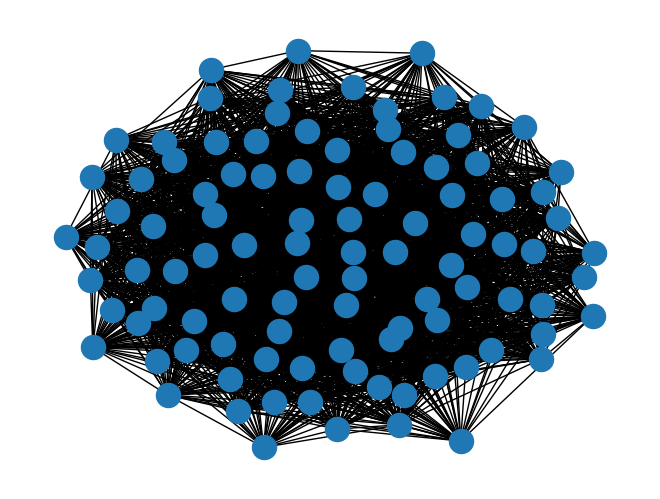

In [40]:
g = nx.erdos_renyi_graph(100, 0.5)
nx.draw(g)

In [28]:
g_adj = nx.to_numpy_array(g) ; g_adj

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 1., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [30]:
P = PathCensus(g_adj)

In [32]:
P.census("edges")

t  tw  th   q0    qw    qh
i  j                              
0  2   24  50  51  355  2383  2487
   3   22  50  47  342  2389  2259
   7   27  50  51  267  2380  2427
   8   29  50  50  221  2379  2404
   10  23  50  45  276  2390  2166
...    ..  ..  ..  ...   ...   ...
99 92  20  47  41  279  2238  1964
   94  20  47  52  421  2227  2506
   95  19  47  49  415  2231  2350
   96  22  47  48  346  2229  2303
   98  23  47  49  316  2227  2344

[4908 rows x 6 columns]

In [33]:
P.similarity("global")

0.4929904185577408